In [1]:
import pandas as pd
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator
sns.set()

# 1. Przygotowanie danych
- Dane zostały pobrane z https://dane.gov.pl/pl/dataset/1101,wykaz-przedsiebiorstw-panstwowych
- Dane zostały poddane lekkiej obróbce w celu uspójnienia formatu:
    - uspójniony format nazw
    - uspójnione nazwy kolumn
    - usunięte kolumny, które nie występują we wszystkich plikach
 


In [9]:
df = pd.DataFrame()

for path in Path("./data").iterdir():
    _df = pd.read_excel(path, header=0)
    _df['date'] = path.stem.split('_')[1]
    df = pd.concat([df, _df])

df['date'] = pd.to_datetime(df['date'])

# 2. Analiza
## 2.1. Obecny stan przedsiębiorstw państwowych

In [31]:
df_last = pd.read_excel("./data/wykaz_2023-06-30.xls")
_df_status = df_last['status'].value_counts().sort_values()
_df_status.to_frame()

,count
status,
upadłość umorzona,1
w likwidacji,1
w upadłości,6
aktywne,9


Text(0.5, 1.05, 'Status przedsiębiorstw państwowych')

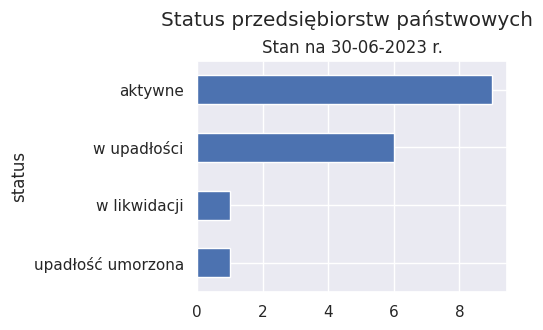

In [28]:
_, ax = plt.subplots(figsize=(4, 3))

_df_status.plot.barh()
plt.title("Stan na 30-06-2023 r.")
plt.suptitle("Status przedsiębiorstw państwowych", y=1.05)

## 2.2. Zmiana liczby przedsiębiorstw państwowych w czasie

In [35]:
df_change = df.groupby('date')['lp'].count()

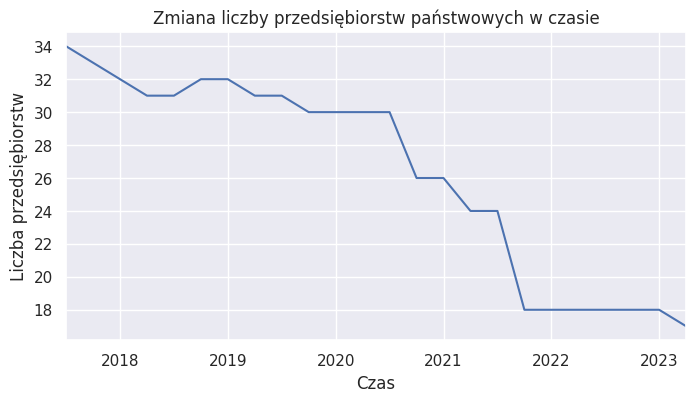

In [36]:
_, ax = plt.subplots(figsize=(8, 4))
df.groupby('date')['lp'].count().plot(ax=ax)

plt.title("Zmiana liczby przedsiębiorstw państwowych w czasie")
plt.ylabel("Liczba przedsiębiorstw")
plt.xlabel("Czas")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))